# Schedule-based simulation of M/D/1

What do I need?
- create a distribution for the interval of events (arrival, service)
    + arrival is exponential
    + service is deterministic ie it takes constant time to serve every customer
- How queue works:
    + while smaller than run_until
        + a time step
            add new arrivals if need be -> add the count on length queue
            check if not serve and still queue -> serve until end of serving time -> deduct count
            while serving: skip

How do I incorporate the schedule-based element in?
- since the schedule uses heap -> add events with lower arrival interval in first??
- in the run_simulation function -> generate a list of interval -> for loop??? while loop?



In [5]:
import heapq

class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def add_event_after(self, interval, function, *args, **kwargs):
        # Add an event to the schedule after a specified time interval.
        self.add_event_at(self.now + interval, function, *args, **kwargs)
    
    def next_event_time(self):
        # Return the time of the next event. The `now` attribute of this class
        # contain the time of the last event that was run.
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        # Print out diagnostic information about the events in the schedule.
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')

In [ ]:
import scipy.stats as sts
from matplotlib import pyplot as plt

"""Queue: This class tracks the number of people in the queue and the number of
people being served. It also schedules when a customer starts being served and
stops being served."""
class Queue:

    def __init__(self, inqueue=0, serving=False) -> None:
        self.inqueue = inqueue
        self.serving = serving

    def start_serving(self, timestamp):
        print("start serving at ", timestamp)
    
    def stop_serving(self, timestamp):
        print("stop serving at", timestamp)

"""BusSystem:
 This class contains the queues (in this case only one but you’ll need to
make more than one for your project). It also schedules the arrival of customers at
the queue(s)."""
class System:
    def __init__(self, arrival_rate, departure_rate) -> None:
        self.arrival_distribution = 
        self.departure_rate = departure_rate
        self.queue = Queue(departure_rate)
        self.schedule = Schedule()
    
    def arrive(self, timestamp):
        print("new customer arrived at", timestamp)

    def schedule_arrival(self):

        self.schedule.add_event_at(self.schedule.now+)
    
    def schedule_start_serving(self, time_now):
        if self.serving == False and len(self.inqueue) > 0:
            self.serving = True
            
        elif self.serving == True:
            self.stop_serving = 0

    def schedule_stop_serving(self, time_now):
        ...
"""
Create a function called run_simulation(arrival_rate, service_rate,
run_until) that will run the M/D/1 queue simulation with the specified average arrival
and service rates, as well as the total time for which to run the simulation
- plot the number of people in queue over time
"""

def run_simulation(arrival_rate, service_rate, run_until):
    pass

"""
print out/ plot the arrival intervals and the departure intervals
"""


# Class code reference

In [2]:
pip install matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached Pillow-9.0.0-cp38-cp38-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)
Note: you may need to restart the kernel to use updated packages.


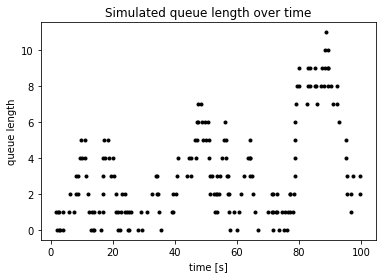

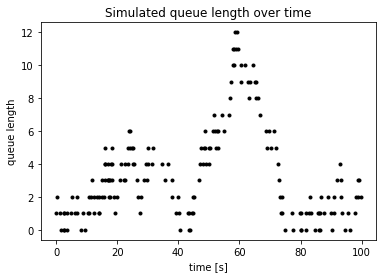

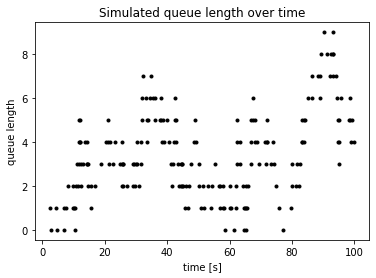

In [4]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt


def run_experiment(arrival_rate, departure_rate, final_time):
    '''
    Run the queueing experiment for particular arrival and departure rates.
    This will make a plot of the number of people in the queue over time.
    
    Inputs:
    
        arrival_rate (float) The rate at which new people join the back of the
          queue. Units: people per second.
        
        departure_rate (float) The rate at which people are served and leave
          the queue. Units people per second.
        
        final_time (float) Until what time to run the simulation. When the next
        arrival and departure times are later than this, the simulation will
        end. Units: seconds.

    Returns: None
    '''

    # Set up the exponential distributions for arrivals and departures
    arrival_distribution = sts.expon(scale=1/arrival_rate)
    departure_distribution = sts.expon(scale=1/departure_rate)

    people_in_queue = 0  # Start with an empty queue
    next_arrival_time = arrival_distribution.rvs()  # Generate the first arrival

    # We need at least 1 arrival before we can have departures so we set the
    # first departure time to infinity. This will be modified below.
    next_departure_time = np.inf

    plot_data = {
        'time': [],
        'people_in_queue': []}

    while min(next_arrival_time, next_departure_time) < final_time:

        if next_arrival_time < next_departure_time:
            # Handle arrivals
            plot_data['time'].append(next_arrival_time)
            people_in_queue += 1
            if people_in_queue == 1:
                # We just went from an empty queue to 1 person and need to
                # generate the next departure time (because it is currently
                # infinity).
                assert next_departure_time == np.inf  # Sanity check
                next_departure_time = (
                    next_arrival_time + departure_distribution.rvs())
            # Generate the next arrival time
            next_arrival_time += arrival_distribution.rvs()

        else:
            # Handle departures
            plot_data['time'].append(next_departure_time)
            people_in_queue -= 1
            if people_in_queue == 0:
                # There is nobody in the queue so we should not generate a new
                # departure time.
                next_departure_time = np.inf
            else:
                # Generate the next departure time
                next_departure_time += departure_distribution.rvs()
        assert people_in_queue >= 0  # Sanity check
        plot_data['people_in_queue'].append(people_in_queue)

    # Make the plot of the queue length over time
    plt.figure()
    plt.title('Simulated queue length over time')
    plt.plot(plot_data['time'], plot_data['people_in_queue'], 'k.')
    plt.xlabel('time [s]')
    plt.ylabel('queue length')
    plt.show()


arrival_rate = 1
departure_rate = 1
final_time = 100

# Run the simulation 3 times to see different random results
for i in range(3):
    run_experiment(arrival_rate, departure_rate, final_time)
